In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [42]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape

(64461, 61)

In [43]:
pd.set_option('display.max_columns', 6) # number of Colums
pd.set_option('display.max_rows', None) # number of Rows

                                            Data Processing 

In [44]:
#function sorts data by growth/by reduction 
def sort_dict_by_value(Dictionary, reverse = False):       
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

In [45]:
#function to build barchart
def Build_Barh( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible,title):
    
    fig, ax = plt.subplots()


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)  # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 
        
        
    for spine in ax.spines.values():    #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title

    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)


    plt.show()

In [46]:
def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)  # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():     #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  #putting/removing values on x Axis
    ax.axes.get_xaxis().set_visible(x_axis_visible)  #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   #style of drawing
    
    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [47]:
def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)   # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():      #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)   #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()


In [48]:
def Build_Barh_sizes_percentage (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, Quantity)] # accuracy of percentage 


    plt.barh(langs, langs_users_num)    # drawing itself
    plt.yticks(range(len(langs)), new_labels)  # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():     #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible) #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()

                                                 Function of list sorting 

In [49]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    #declaring as global to be used in different functions
  global Quantity        #declaring as global to be used in different functions
  

  union = []                          # empty list(just like my life)

  for i in filtered_list:
      for k in i :                    # adds data in list named union
          union.append(k)

  Counted = Counter(union)             #writing in dictionary and counting  the number of answers 



  Counted = sort_dict_by_value(Counted, False)  #sorting data by growth/by reduction 

  #empty lists to add related data later
  key_Phrases = []  
  Quantity = []  

  

  items = Counted.items()    #  #rewriting data into listsy
  #adding key phrases and quantity to relevant empty list
  for item in items:       
      key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
      Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 

In [50]:
#creating the function where is written logics for sorting data
def logics_for_less_than_5s(data_name):
    #Creating empty lists with specific ages where the related data will be placed 
    less_than_5 = []
    five_to_9 = []
    ten_to_14 = []
    fifteen_to_19 = []
    twenty_to_24 = []
    twentyfive_to_29 = []
    thirty_to_34 = []
    thirtyfive_to_39 = []
    fourty_to_44 = []
    fourtyfive_to_49 = []
    fifty_or_more = []

    #adding data to related lists 
    for i in data_name:
        if int(i) in list(range(0,5)):
            less_than_5.append(i)
        elif int(i) in list(range(5,10)):
            five_to_9.append(i)
        elif int(i) in list(range(10,15)):
            ten_to_14.append(i)
        elif int(i) in list(range(15,20)):
            fifteen_to_19.append(i)
        elif int(i) in list(range (20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (30,35)):
            thirty_to_34.append(i)
        elif int(i) in list(range (35,40)):
            thirtyfive_to_39.append(i)
        elif int(i) in list(range (40,45)):
            fourty_to_44.append(i)
        elif int(i) in list(range(45,50)):
            fourtyfive_to_49.append(i)
        else:
            fifty_or_more.append(i)

    #defining length of the lists that have been created after adding data 
    len_less_than_5 = len(less_than_5)
    len_five_to_9 = len(five_to_9)
    len_ten_to_14 = len(ten_to_14)
    len_fifteen_to_19 = len(fifteen_to_19)
    len_twenty_to_24 = len(twenty_to_24)
    len_twentyfive_to_29 = len(twentyfive_to_29)
    len_thirty_to_34 = len(thirty_to_34)
    len_thirtyfive_to_39 = len(thirtyfive_to_39)
    len_fourty_to_44 = len(fourty_to_44)
    len_fourtyfive_to_49 = len(fourtyfive_to_49)
    len_fifty_or_more = len(fifty_or_more)
    
    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Less than 5 years", "5 to 9 years", "10 to 14 years", "15 to 19 years", "20 to 24 years", "25 to 29 years", 
                 "30 to 34 years", "35 to 39 years", "40 to 44 years", "45 to 49 years", "50 years or more"]
    Quantity = [len_less_than_5, len_five_to_9, len_ten_to_14, len_fifteen_to_19, len_twenty_to_24, len_twentyfive_to_29,
               len_thirty_to_34, len_thirtyfive_to_39, len_fourty_to_44, len_fourtyfive_to_49, len_fifty_or_more ]

                                            Working With data istelf 
                                        

                                               Developer Type 

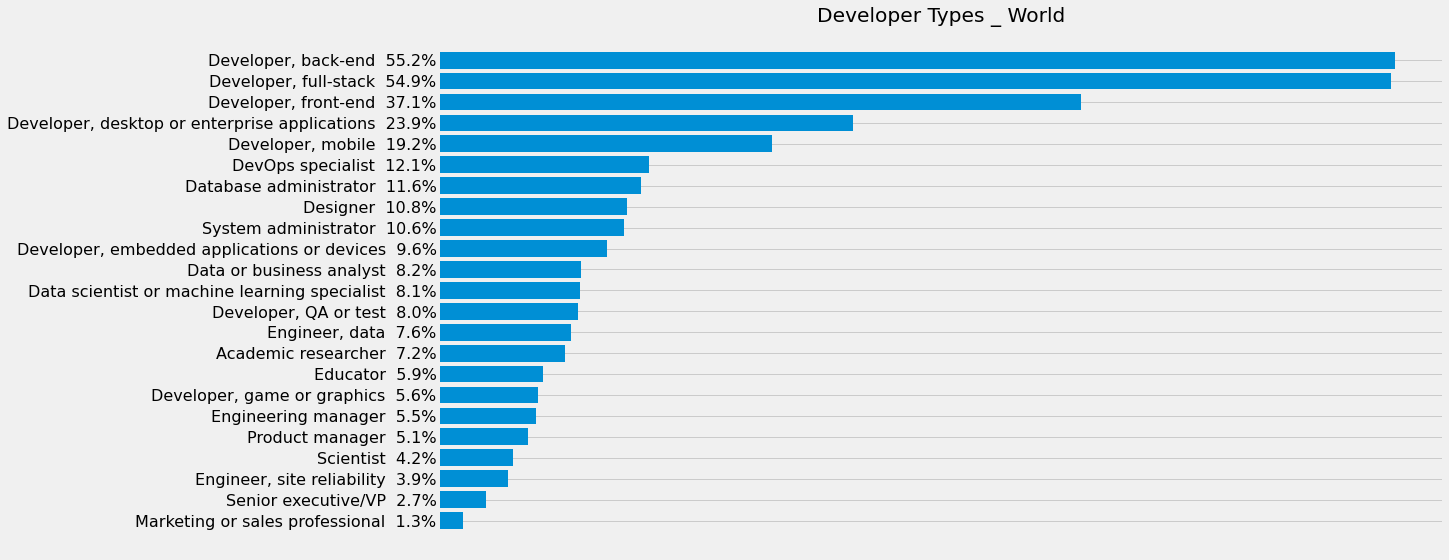

In [51]:
DevType= data["DevType"]  #calling data from "Devtype"
DevType.dropna(inplace =True) #filtering the data from empty and unnecessary answers
DevType = DevType.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(DevType) #autosorting

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types _ World") #building barchart

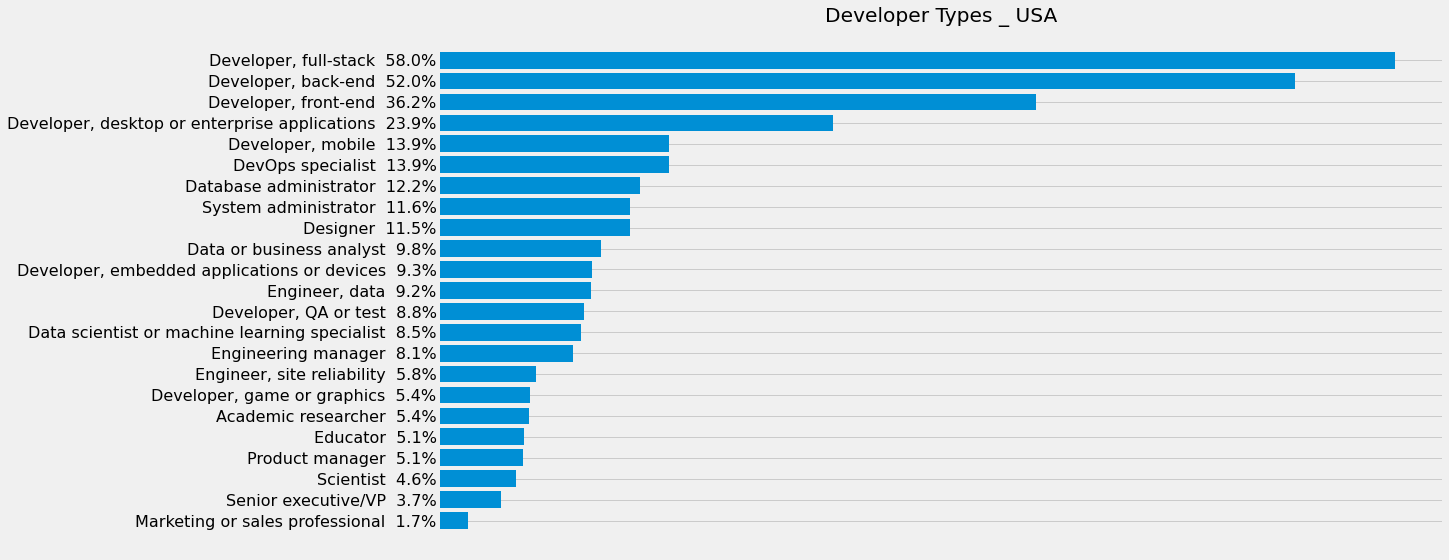

In [52]:
DevType= data["DevType"]  #calling data from "Devtype"
DevType.dropna(inplace =True) #filtering the data from empty and unnecessary answers

new_data = data[(DevType != "nan") & (data["Country"] == "United States")] #combining data from USA and devtype
New_data = new_data["DevType"] #writing comnined data in a new variable
New_data = New_data.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(New_data)

Build_Barh_sizes( key_Phrases , Quantity, New_data ,"fivethirtyeight", False , (16,9), "Developer Types _ USA") #building barchart

                                                Coding as a hobby

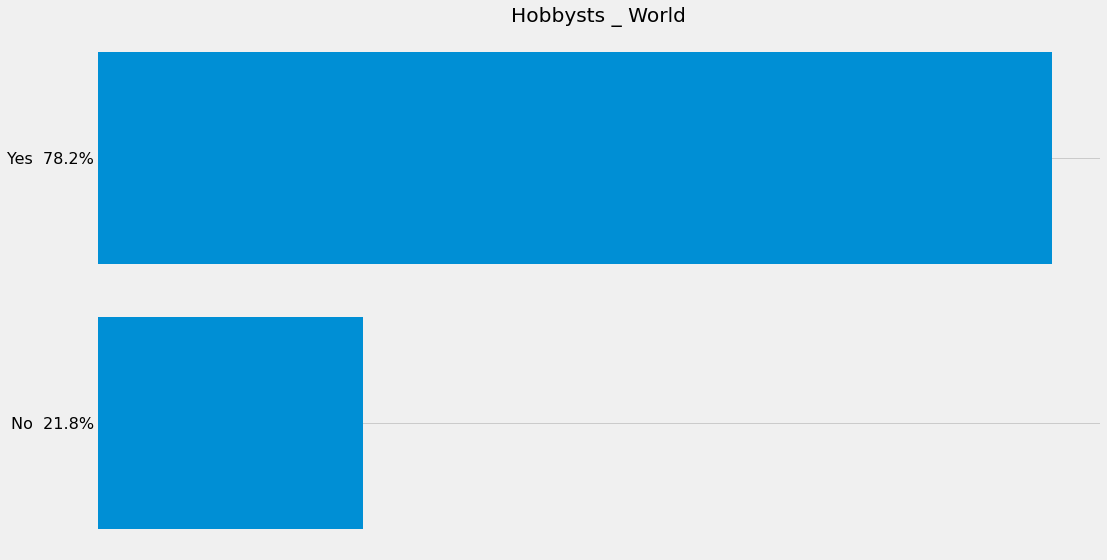

In [53]:
hobbysts = data["Hobbyist"]  #calling data from "Hobbyist"
hobbysts.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(hobbysts)  #writing in dictionary and counting 

#empty lists to add related data later 
key_Phrases = []
Quantity = []

items = counted.items() #rewritin =g data into lists

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()   

Build_Barh_sizes( key_Phrases , Quantity, hobbysts ,"fivethirtyeight", False , (16,9), "Hobbysts _ World") #building barchart


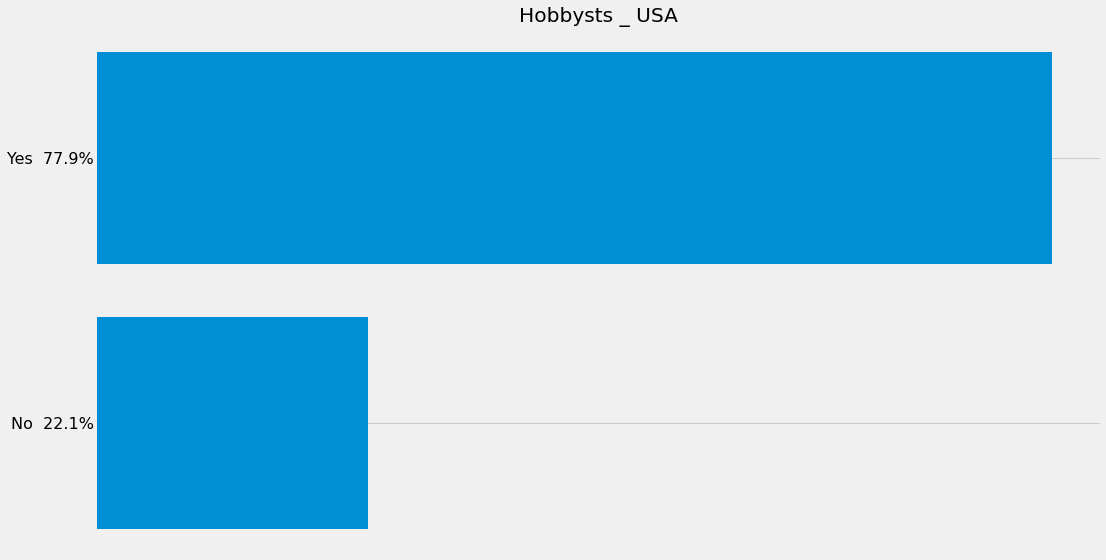

In [54]:
hobbysts = data["Hobbyist"]  #calling data from "Hobbyist"
hobbysts.dropna(inplace = True) #filtering the data from empty and unnecessary answers

new_data = data[(hobbysts != "nan") & (data["Country"] == "United States")] #combining Hobbyist and USA's data 
New_data = new_data["Hobbyist"] #writing comnined data in a new variable

counted = Counter(New_data) #writing in dictionary and counting 

#empty lists to add related data later 
key_Phrases = []
Quantity = []

items = counted.items() #rewritin =g data into lists

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0]) #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])    #the data that is placed at "1" appends on Quantity

#reversing key phrases and quantity
key_Phrases.reverse() 
Quantity.reverse()    

Build_Barh_sizes( key_Phrases , Quantity, New_data ,"fivethirtyeight", False , (16,9), "Hobbysts _ USA") #building barchart



                                        Years Since Learning to Code

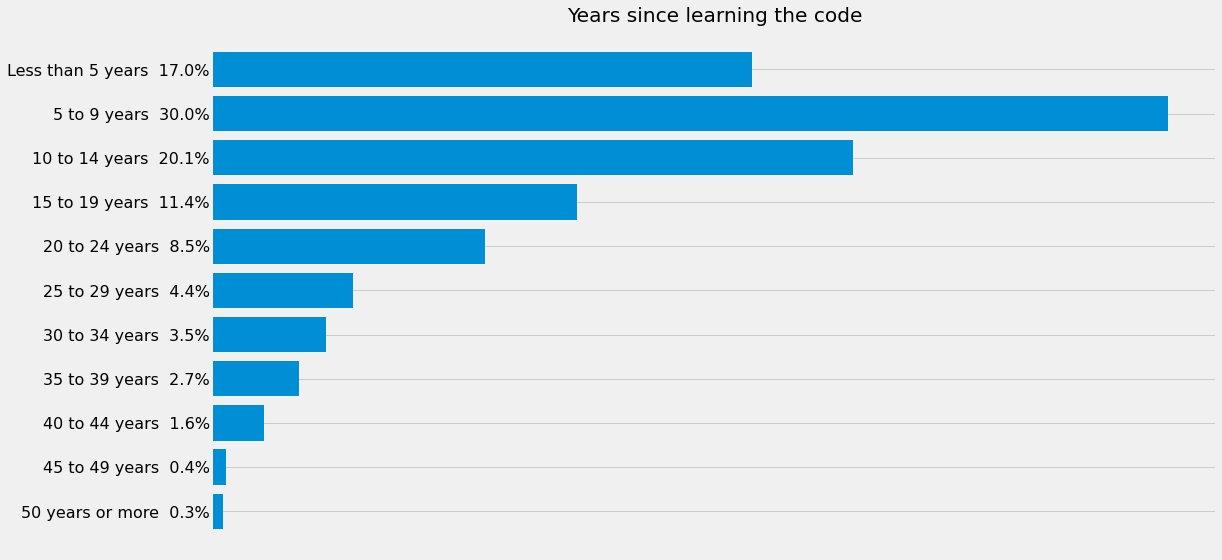

In [61]:
years_of_coding =  data["YearsCode"]  #calling data from years of coding
years_of_coding.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

years_of_coding = np.array(years_of_coding) #transfers data in list
years_of_coding = np.where( years_of_coding == "Less than 1 year" , 1, years_of_coding) # changing "less than 1 year" variable as 1 year
years_of_coding = np.where(years_of_coding == "More than 50 years", 50, years_of_coding) # changing "more then 50 years" variable as 50 years


logics_for_less_than_5s(years_of_coding) #automatically sorting data with function

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, years_of_coding ,"fivethirtyeight", False , (16,9), "Years since learning the code") #building barchart


                                        Professionally Coding

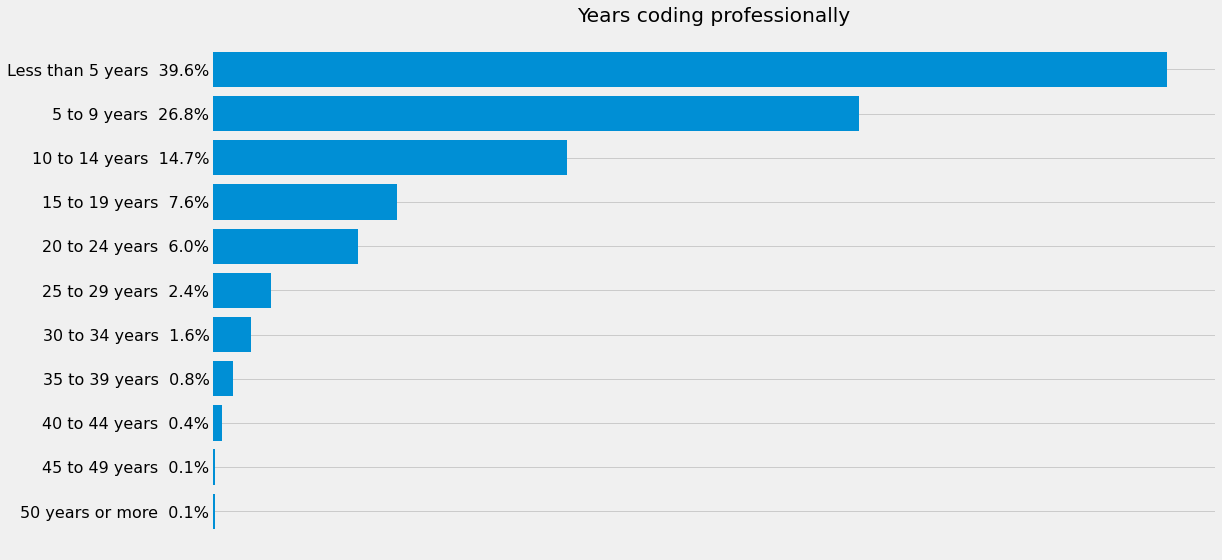

In [69]:
years_code_pro = data["YearsCodePro"] #calling data from years of coding
years_code_pro.dropna(inplace = True) #filtering the data from empty and unnecessary answers

years_code_pro = np.array(years_code_pro)  #transfers data in list
years_code_pro = np.where(years_code_pro == "Less than 1 year", 1, years_code_pro) # changing "less than 1 year" variable as 1 year
years_code_pro = np.where(years_code_pro == "More than 50 years", 50, years_code_pro) # changing "more then 50 years" variable as 50 years

logics_for_less_than_5s(years_code_pro)  #automatically sorting data with function

#reversing key phrases and Quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, years_code_pro ,"fivethirtyeight", False , (16,9), "Years coding professionally") #building barchart
